In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#### simple model: only numerical values

data = pd.read_csv('houses_train.csv') 
data.head() 

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,5546,130000.0,newly repaired,Center,4,Sayat Nova Ave,3,Yerevan,96.0,http://www.myrealty.am/en/item/28244/3-senyaka...,1,stone,3,3.2
1,2979,65000.0,good,Arabkir,5,Hr.Kochar St,3,Yerevan,78.0,http://www.myrealty.am/en/item/18029/3-senyaka...,1,stone,2,2.8
2,2698,129000.0,good,Center,10,M.Khorenatsi St,3,Yerevan,90.0,http://www.myrealty.am/en/item/37797/3-senyaka...,1,panel,3,2.8
3,4548,52000.0,newly repaired,Center,14,Argishti St,2,Yerevan,53.0,http://www.myrealty.am/en/item/36153/2-senyaka...,1,monolit,5,3.0
4,2982,65000.0,newly repaired,Center,12,Mashtots Ave,2,Yerevan,47.0,http://www.myrealty.am/en/item/17566/2-senyaka...,1,panel,3,2.8


In [3]:
y = data['price']

X = data.drop(['Unnamed: 0', 'price', 'condition', 'district', 'street', 'region', 'url', 'building_type'], axis = 1)
X.head()

,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height
0,4,3,96.0,1,3,3.2
1,5,3,78.0,1,2,2.8
2,10,3,90.0,1,3,2.8
3,14,2,53.0,1,5,3.0
4,12,2,47.0,1,3,2.8


Text(0, 0.5, 'Predictions')

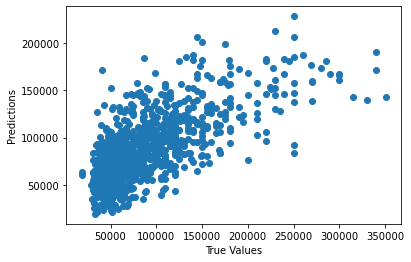

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print (X_train.shape, y_train.shape)
# print (X_test.shape, y_test.shape)

# fit a linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [5]:
# some initial score to work with 
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 37820.983243144576
Train RMSE: 36417.97366078309


Cross-validated scores: [0.45312531 0.53499302 0.46336264 0.50859669 0.51431916 0.43906838]
RMSE: 36772.794447561675


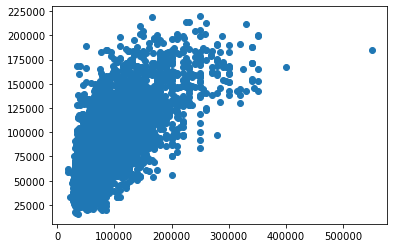

In [6]:
# cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# checking if the data is moreless balanced
scores = cross_val_score(model, X, y, cv = 6)
print ('Cross-validated scores:', scores)

# prediction and rmse on the whole data
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

print("RMSE:", np.sqrt(mean_squared_error(y,predictions)))

In [7]:
#### next model: only numerical values, polynomial regression

data = pd.read_csv('houses_train.csv') 

X = data.drop(['Unnamed: 0', 'condition', 'district', 'street', 'region', 'url', 'building_type'], axis = 1)
X.corr()
# seems that area, num_rooms, num_bathrooms, ceiling_height are important features

y = data['price']

X = X.drop(['price'], axis = 1)

# add some polynomial features
X['add_feature_1'] = X.area ** 2
X['add_feature_2'] = X.area ** 3

X['add_feature_3'] = X.num_rooms * X.area
X['add_feature_4'] = X.area * X.floor
X['add_feature_5'] = X.area * X.ceiling_height
X['add_feature_6'] = X.area * X.max_floor

X

,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,add_feature_1,add_feature_2,add_feature_3,add_feature_4,add_feature_5,add_feature_6
0,4,3,96.0,1,3,3.2,9216.0,884736.0,288.0,288.0,307.2,384.0
1,5,3,78.0,1,2,2.8,6084.0,474552.0,234.0,156.0,218.4,390.0
2,10,3,90.0,1,3,2.8,8100.0,729000.0,270.0,270.0,252.0,900.0
3,14,2,53.0,1,5,3.0,2809.0,148877.0,106.0,265.0,159.0,742.0
4,12,2,47.0,1,3,2.8,2209.0,103823.0,94.0,141.0,131.6,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16,3,100.0,1,8,2.8,10000.0,1000000.0,300.0,800.0,280.0,1600.0
4996,6,3,135.0,1,5,2.8,18225.0,2460375.0,405.0,675.0,378.0,810.0
4997,9,3,73.0,2,3,3.0,5329.0,389017.0,219.0,219.0,219.0,657.0
4998,5,1,48.0,1,1,2.8,2304.0,110592.0,48.0,48.0,134.4,240.0


Cross-validated scores: [0.47050555 0.56416169 0.47801205 0.52264619 0.54221793 0.4688948 ]
RMSE: 35992.37224037421


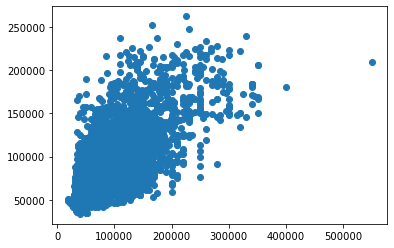

In [8]:
# fit a linear model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

# cross validation scores
scores = cross_val_score(model, X, y, cv = 6)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y, predictions)
# this seems better

print("RMSE:", np.sqrt(mean_squared_error(y,predictions)))
# this model has better rmse score

In [9]:
#### next model: lets take all the same as above + use onehotencoding for district, building_type and condition

data = pd.read_csv('houses_train.csv') 

y = data['price']
 
x1 = pd.get_dummies(data[['condition', 'district', 'building_type']])
x2 = data.drop(['Unnamed: 0', "price", "region", "url", 'condition', 'district', 'street', 'building_type'], axis = 1)

X = pd.concat([x1, x2], axis = 1)

# add the same polynomial features
X['add_feature_1'] = X.area ** 2
X['add_feature_2'] = X.area ** 3

X['add_feature_3'] = X.num_rooms * X.area
X['add_feature_4'] = X.area * X.floor
X['add_feature_5'] = X.area * X.ceiling_height
X['add_feature_6'] = X.area * X.max_floor

X

,condition_good,condition_newly repaired,condition_zero condition,district_Achapnyak,district_Arabkir,district_Avan,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,...,area,num_bathrooms,floor,ceiling_height,add_feature_1,add_feature_2,add_feature_3,add_feature_4,add_feature_5,add_feature_6
0,0,1,0,0,0,0,1,0,0,0,...,96.0,1,3,3.2,9216.0,884736.0,288.0,288.0,307.2,384.0
1,1,0,0,0,1,0,0,0,0,0,...,78.0,1,2,2.8,6084.0,474552.0,234.0,156.0,218.4,390.0
2,1,0,0,0,0,0,1,0,0,0,...,90.0,1,3,2.8,8100.0,729000.0,270.0,270.0,252.0,900.0
3,0,1,0,0,0,0,1,0,0,0,...,53.0,1,5,3.0,2809.0,148877.0,106.0,265.0,159.0,742.0
4,0,1,0,0,0,0,1,0,0,0,...,47.0,1,3,2.8,2209.0,103823.0,94.0,141.0,131.6,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,0,0,1,0,0,...,100.0,1,8,2.8,10000.0,1000000.0,300.0,800.0,280.0,1600.0
4996,1,0,0,0,1,0,0,0,0,0,...,135.0,1,5,2.8,18225.0,2460375.0,405.0,675.0,378.0,810.0
4997,0,1,0,0,0,0,1,0,0,0,...,73.0,2,3,3.0,5329.0,389017.0,219.0,219.0,219.0,657.0
4998,1,0,0,0,0,0,1,0,0,0,...,48.0,1,1,2.8,2304.0,110592.0,48.0,48.0,134.4,240.0


Cross-validated scores: [0.65219515 0.70834995 0.67894149 0.69429594 0.71055422 0.677053  ]
RMSE: 28697.37815839079


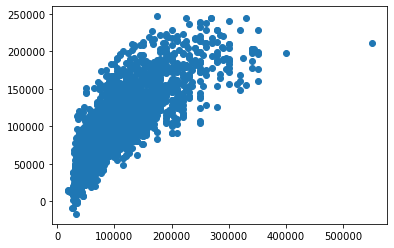

In [10]:
# fit a linear model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

# cross validation scores
scores = cross_val_score(model, X, y, cv = 6)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y,predictions)
# this seems better

print("RMSE:", np.sqrt(mean_squared_error(y,predictions)))
# this model has noticeably better cross-validation and rmse scores -> let's go further!

In [39]:
#### now lets take above polynomial features, use onehotencoding for district, building_type, condition and street

data = pd.read_csv('houses_train.csv') 

y = data['price']

# let's take the log of price to as the above graph seems like not truly linear but log or power(1/n)
Y = np.log(y)

#onehotencoding also for street
x1 = pd.get_dummies(data[['condition', 'district', 'street', 'building_type']])
x2 = data.drop(['Unnamed: 0', "price", "region", "url", 'condition', 'district', 'street', 'building_type'], axis = 1)

X = pd.concat([x1, x2], axis = 1)

# add the same polynomial features
X['add_feature_1'] = X.area ** 2
X['add_feature_2'] = X.area ** 3

X['add_feature_3'] = X.num_rooms * X.area
X['add_feature_4'] = X.area * X.floor
X['add_feature_5'] = X.area * X.ceiling_height
X['add_feature_6'] = X.area * X.max_floor

#minmax scaling
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X = pd.DataFrame(columns = X.columns, data = norm.transform(X))

X

,condition_good,condition_newly repaired,condition_zero condition,district_Achapnyak,district_Arabkir,district_Avan,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,...,area,num_bathrooms,floor,ceiling_height,add_feature_1,add_feature_2,add_feature_3,add_feature_4,add_feature_5,add_feature_6
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.565574,0.000000,0.136364,0.500000,0.395259,0.263073,0.338521,0.109091,0.574297,0.105817
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.418033,0.000000,0.090909,0.166667,0.249395,0.138331,0.268482,0.059091,0.351406,0.107788
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.516393,0.000000,0.136364,0.166667,0.343284,0.215712,0.315175,0.102273,0.435743,0.275386
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.213115,0.000000,0.227273,0.333333,0.096870,0.039289,0.102464,0.100379,0.202309,0.223464
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.163934,0.000000,0.136364,0.166667,0.068927,0.025588,0.086900,0.053409,0.133534,0.164969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.598361,0.000000,0.363636,0.166667,0.431772,0.298126,0.354086,0.303030,0.506024,0.505422
4996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.885246,0.000000,0.227273,0.166667,0.814829,0.742243,0.490272,0.255682,0.752008,0.245810
4997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.377049,0.333333,0.136364,0.333333,0.214232,0.112319,0.249027,0.082955,0.352912,0.195531
4998,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.172131,0.000000,0.045455,0.166667,0.073351,0.027646,0.027237,0.018182,0.140562,0.058495


20463.037384209605
22932.06304797548


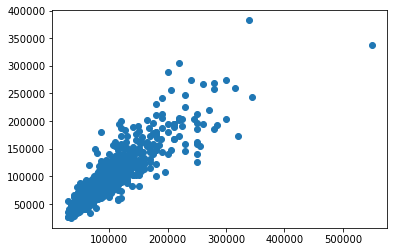

In [40]:
# let's make a ridge regression on this
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# fit a model
lm = Ridge(alpha = 0.5, fit_intercept=True)
model = lm.fit(X_train, Y_train)
# print(np.exp(lm.intercept_))
# print(len(lm.coef_))

predictions = lm.predict(X_train)
print(np.sqrt(mean_squared_error(np.exp(Y_train), np.exp(predictions))))

predictions = lm.predict(X_test)
print(np.sqrt(mean_squared_error(np.exp(Y_test), np.exp(predictions))))

plt.scatter(np.exp(Y_test), np.exp(predictions))

In [129]:
# this seems a good model. let's use it.

In [129]:
########
########
# insights before going further:

# 1. info from districts and streets is extremely valuable
# 2. the main problem is the possibly that in the final set some streets from the above set X might be 
# missing as well as some new streets will be available in the set provided by Nairi

# I'm tackling this in a following way: 
# 1. delete_rows(train_dataset, test_dataset) cleans up both datasets such that they have the same streets
# 2. hence after onehotencoding the corresponding matrices should have the same shapes. 

# for some reasons I wasn't able to finish this function hence not always it is giving the needed datasets (in fact 1 case out of 5-10 cases will be successful)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# the above one is working
def delete_rows(train_dataset, test_dataset):
    columns = ['street', 'district','condition', 'building_type']
    x_train = train_dataset.copy()
    x_test = test_dataset.copy()
    
    for i in columns:
        d1 = np.unique(x_train[i])
        d2 = np.unique(x_test[i])
        
        available_in_d1_not_in_d2 = np.reshape(np.argwhere(np.logical_not(np.isin(d1, d2) )),-1)
        
        for l in available_in_d1_not_in_d2:
            x_train = x_train[~x_train[i].str.contains(d1[l])]
         
    return x_train

In [3]:
def data_preprocessing(dataset):
    data = dataset.copy()
    data = data.drop(['Unnamed: 0', 'price'], axis = 1)

    data_1 = pd.get_dummies(data[['condition','street', 'district', 'building_type']])
    data_2 = data.drop(['region', 'url', 'condition', 'district', 'street', 'building_type'], axis = 1)
    
    data = pd.concat([data_1, data_2], axis = 1)
    
    data['add_feature_1'] = data.area ** 2
    data['add_feature_2'] = data.area ** 3

    data['add_feature_3'] = data.num_rooms * data.area
    data['add_feature_4'] = data.area * data.floor
    data['add_feature_5'] = data.area * data.ceiling_height
    data['add_feature_6'] = data.area * data.max_floor
    
    return data

In [34]:
def retrain_and_predict(Train_dataset, Test_dataset):
    train_dataset = delete_rows(Train_dataset, Test_dataset)
    test_dataset = delete_rows(Test_dataset, train_dataset)
    
    value_train = np.log(train_dataset['price'])
    value_test = np.log(test_dataset['price'])
    
    data_train = data_preprocessing(train_dataset)
    data_test = data_preprocessing(test_dataset)
    print(data_train.shape)
    print(data_test.shape)
    
    norm = MinMaxScaler().fit(data_train)
    data_train = pd.DataFrame(columns = data_train.columns, data = norm.transform(data_train))
    data_test = pd.DataFrame(columns = data_test.columns, data = norm.transform(data_test))
 
    # fit a model
    rr = Ridge(alpha = 0.5)
    model = rr.fit(data_train, value_train)
    predictions = rr.predict(data_test)
    
    return np.exp(predictions)

In [60]:
data = pd.read_csv('houses_train.csv') 

df1 = data.reindex(np.random.permutation(data.index))

Data_train = df1.iloc[:4000]
Data_test = df1.iloc[4000:]

retrain_and_predict(Data_train, Data_test)

(3678, 222)
(983, 222)


/Users/tigrani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


array([ 96833.27130283,  89440.17994109,  93806.66878536, 119828.76806585,
        51238.77540206,  43228.58072996, 129287.55622556, 103449.91141598,
        98325.32823172,  72568.52996175,  64908.25208493,  30760.58907821,
        97317.014462  ,  97201.20613849,  44170.13665831,  32502.20755683,
       125231.49363314,  79649.28588848,  42885.07610875,  34153.72323457,
        44528.44829876, 125404.11885465, 125721.13688677,  56122.95931651,
        80663.4498065 ,  43239.87382757,  98193.15033806,  90864.80606567,
        99513.87441895,  88328.7327171 ,  61373.85685231,  57117.51763431,
        75567.70785368,  76210.38965456,  22335.3047826 ,  58117.04076052,
        53136.19182633,  57985.71274211,  41917.43828603,  62445.09349992,
        52647.01817677,  44338.8164942 , 108960.62857658,  50982.78211279,
        98553.67980266,  76917.2823567 ,  87757.18566247,  61923.94234833,
        89554.09555932,  40009.45455283,  46714.03710163,  85098.08816498,
       126464.43251936,  

In [ ]:
# so ideally one should take this as a train set
train_set = pd.read_csv('houses_train.csv') 

# then upload the test one
test_set = .....

# and the function retrain_and_predict will make some preprocessing of the test_set 
# and train_set (without training itself on the test_set) and get the array of predictions

retrain_and_predict(train_set, test_set)

In [ ]:
# my code will surely fail the competition as of the problem mentioned above with the delete_rows, 
# but the task itself is very interesting.